<a href="https://colab.research.google.com/github/WanQi-K/DataSciencePortfolio/blob/main/Kaggle_California_House_Pricing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement:

Develop a model to accurately predict the median house value in California using various features like location, housing characteristics, and demographics. This will help understand factors driving house prices and identify areas with high or low housing costs for urban planning and investment decisions.

In [1]:
import numpy as np
import pandas as pd
import scipy
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
sns.set()

!pip install scikit-learn==1.3.0
!pip install xgboost

from google.colab import drive

drive.mount('/content/drive')
pd.options.display.float_format = '{:.2f}'.format
%matplotlib inline

Mounted at /content/drive


In [2]:
path=r'/content/drive/MyDrive/Data Science Data Repository/Kaggle - California House Price Prediction/'

data = pd.read_csv(path+"housing.csv")

In [3]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.00,880.00,129.00,322.00,126.00,8.33,452600.00,NEAR BAY
1,-122.22,37.86,21.00,7099.00,1106.00,2401.00,1138.00,8.30,358500.00,NEAR BAY
2,-122.24,37.85,52.00,1467.00,190.00,496.00,177.00,7.26,352100.00,NEAR BAY
3,-122.25,37.85,52.00,1274.00,235.00,558.00,219.00,5.64,341300.00,NEAR BAY
4,-122.25,37.85,52.00,1627.00,280.00,565.00,259.00,3.85,342200.00,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.00,1665.00,374.00,845.00,330.00,1.56,78100.00,INLAND
20636,-121.21,39.49,18.00,697.00,150.00,356.00,114.00,2.56,77100.00,INLAND
20637,-121.22,39.43,17.00,2254.00,485.00,1007.00,433.00,1.70,92300.00,INLAND
20638,-121.32,39.43,18.00,1860.00,409.00,741.00,349.00,1.87,84700.00,INLAND


#Data Exploration + Data Preparation

In [4]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.00,20640.00,20640.00,20640.00,20433.00,20640.00,20640.00,20640.00,20640.00
mean,-119.57,35.63,28.64,2635.76,537.87,1425.48,499.54,3.87,206855.82
std,2.00,2.14,12.59,2181.62,421.39,1132.46,382.33,1.90,115395.62
min,-124.35,32.54,1.00,2.00,1.00,3.00,1.00,0.50,14999.00
25%,-121.80,33.93,18.00,1447.75,296.00,787.00,280.00,2.56,119600.00
50%,-118.49,34.26,29.00,2127.00,435.00,1166.00,409.00,3.53,179700.00
75%,-118.01,37.71,37.00,3148.00,647.00,1725.00,605.00,4.74,264725.00
max,-114.31,41.95,52.00,39320.00,6445.00,35682.00,6082.00,15.00,500001.00


In [5]:
data.dropna(inplace=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


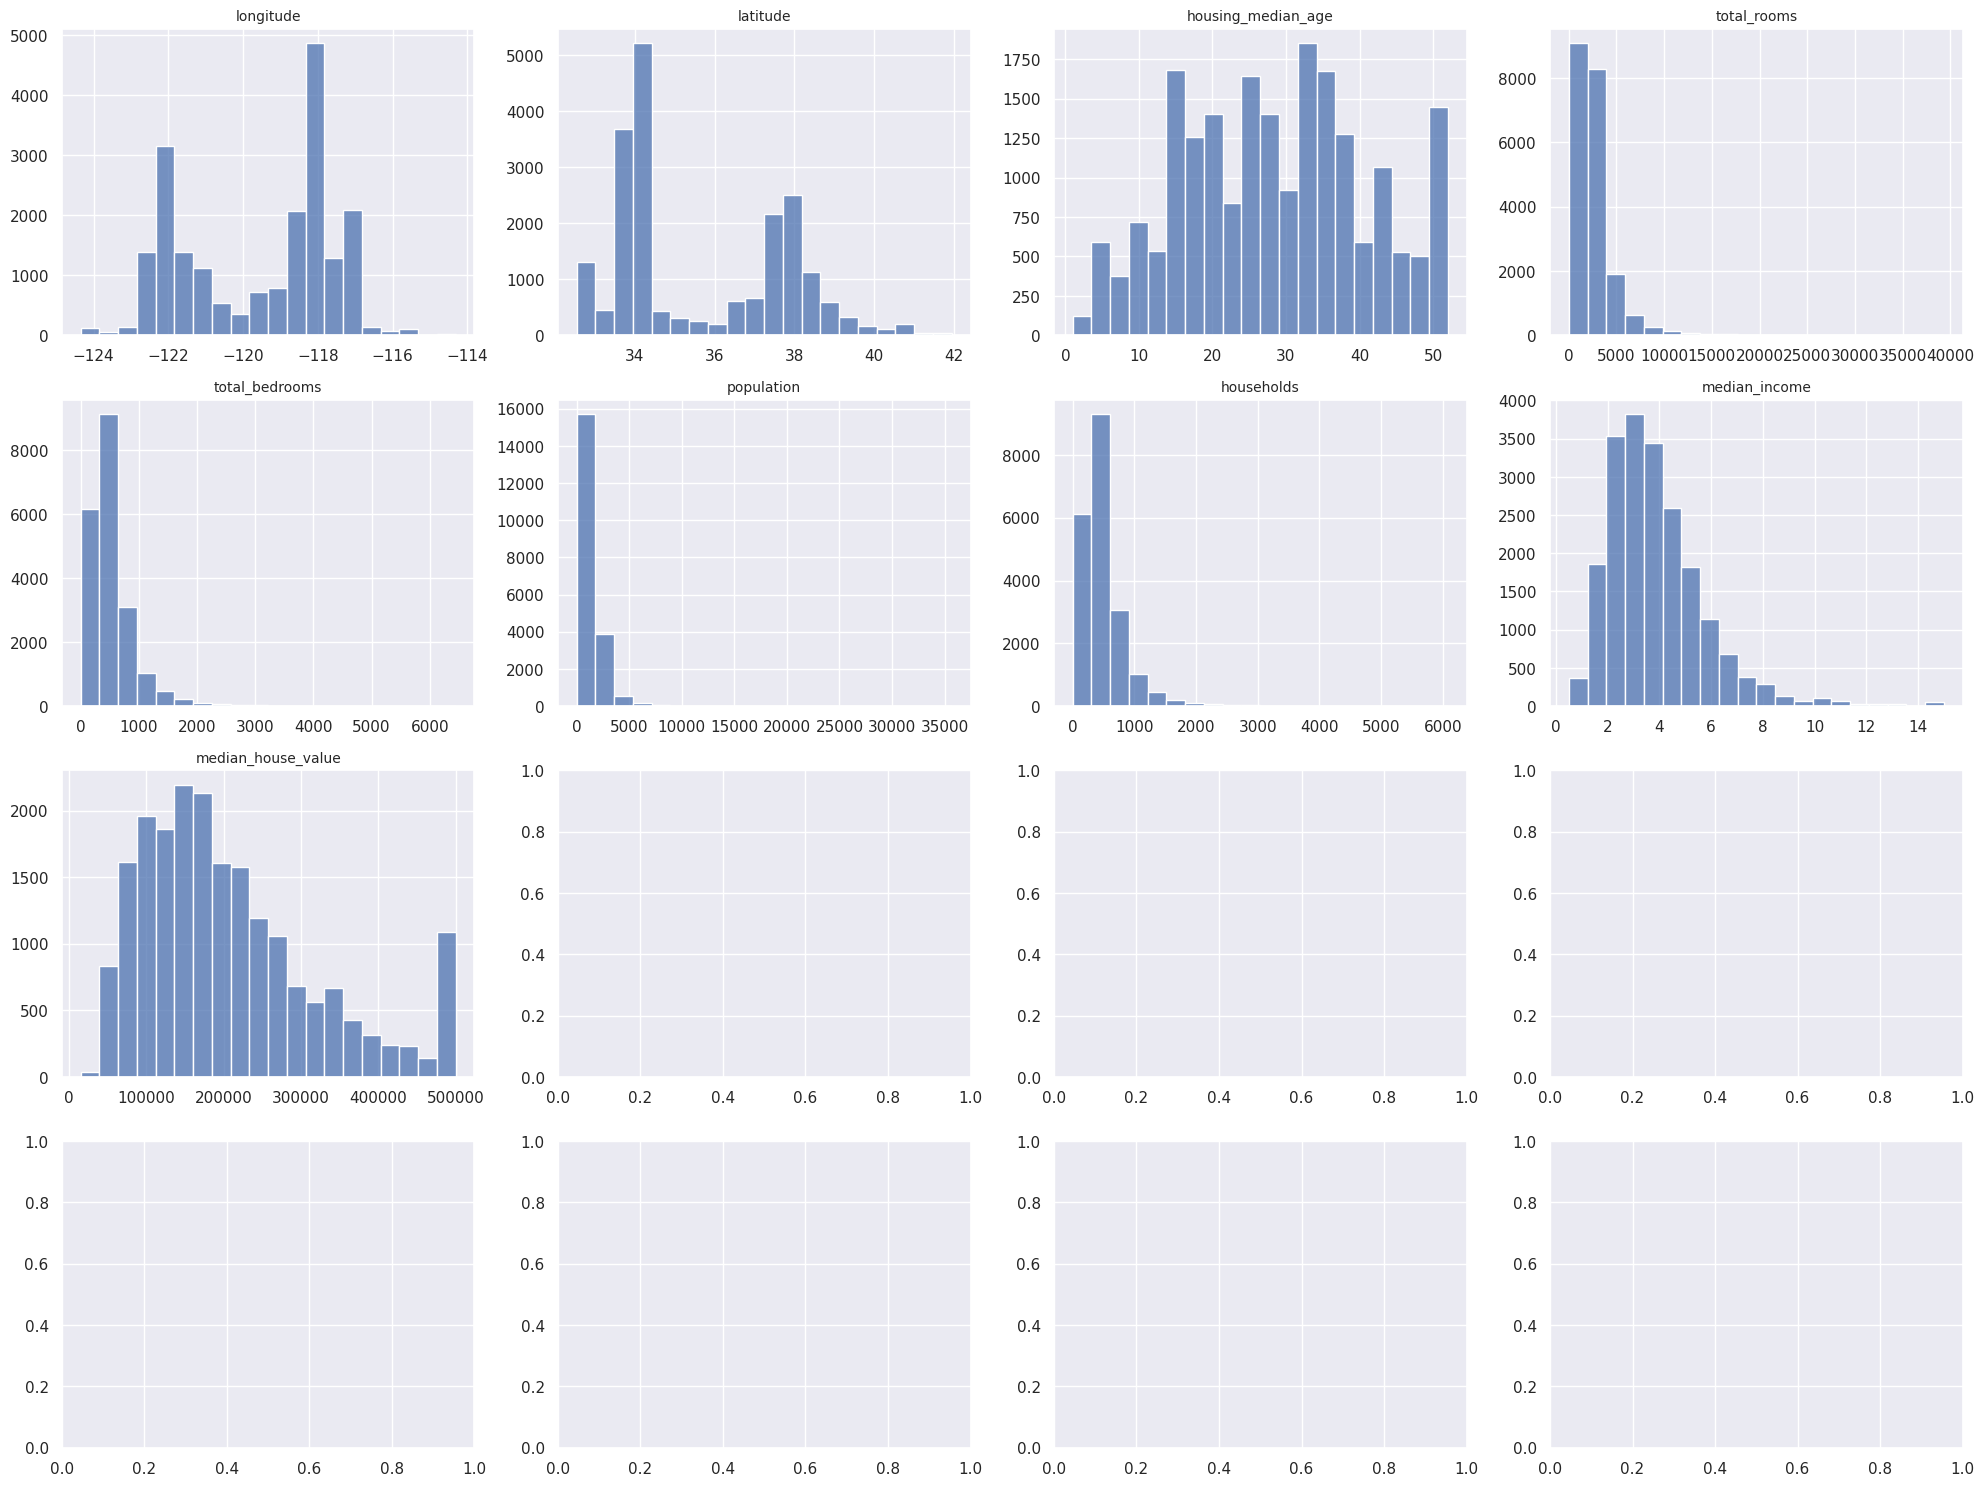

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'data' is your DataFrame

# Select numerical columns for histograms
numerical_cols = data.select_dtypes(include=['number']).columns

# Create a 4x4 grid of subplots
fig, axes = plt.subplots(4, 4, figsize=(20, 15))  # Adjust figsize as needed

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate through numerical columns and plot histograms
for i, col in enumerate(numerical_cols):
    if i < len(axes):  # Ensure we don't exceed the number of subplots
        sns.histplot(data=data, x=col, bins=20, ax=axes[i])  # Plot on the specific subplot
        axes[i].set_title(col, fontsize=10)  # Set title with smaller font size
        axes[i].set_xlabel('')  # Remove x-axis label for space
        axes[i].set_ylabel('')  # Remove y-axis label for space

# Adjust layout to prevent overlapping
plt.tight_layout(pad=1.0)  # Add padding for more space

plt.show()

In [8]:
#Log the selected features
data['total_rooms']=np.log(data['total_rooms']+1)
data['total_bedrooms']=np.log(data['total_bedrooms']+1)
data['population']=np.log(data['population']+1)
data['households']=np.log(data['households']+1)

# Feature Engineering

In [9]:
# Create dummies for all values in ocean_proximity
data.ocean_proximity.value_counts()

,count
ocean_proximity,
<1H OCEAN,9034
INLAND,6496
NEAR OCEAN,2628
NEAR BAY,2270
ISLAND,5


In [10]:
data = data.join(pd.get_dummies(data.ocean_proximity, dtype=int)).drop('ocean_proximity', axis=1)

In [11]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.00,6.78,4.87,5.78,4.84,8.33,452600.00,0,0,0,1,0
1,-122.22,37.86,21.00,8.87,7.01,7.78,7.04,8.30,358500.00,0,0,0,1,0
2,-122.24,37.85,52.00,7.29,5.25,6.21,5.18,7.26,352100.00,0,0,0,1,0
3,-122.25,37.85,52.00,7.15,5.46,6.33,5.39,5.64,341300.00,0,0,0,1,0
4,-122.25,37.85,52.00,7.40,5.64,6.34,5.56,3.85,342200.00,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.00,7.42,5.93,6.74,5.80,1.56,78100.00,0,1,0,0,0
20636,-121.21,39.49,18.00,6.55,5.02,5.88,4.74,2.56,77100.00,0,1,0,0,0
20637,-121.22,39.43,17.00,7.72,6.19,6.92,6.07,1.70,92300.00,0,1,0,0,0
20638,-121.32,39.43,18.00,7.53,6.02,6.61,5.86,1.87,84700.00,0,1,0,0,0


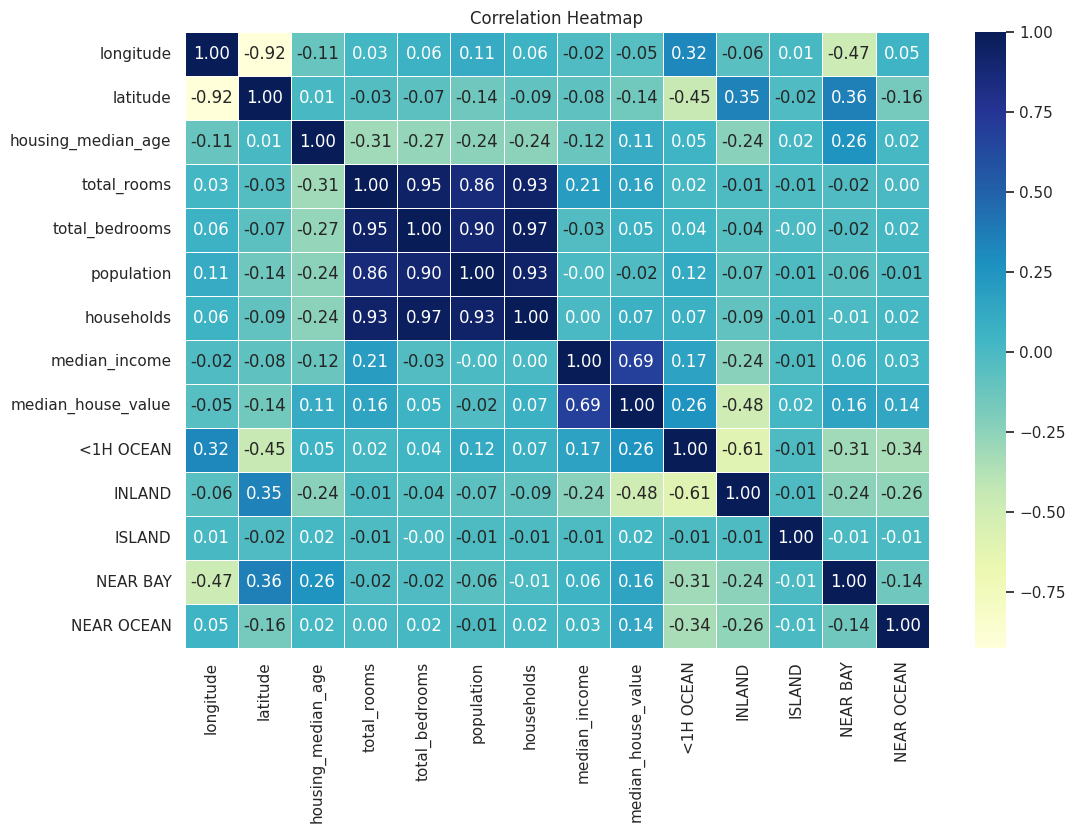

In [12]:
data_corr=data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(data_corr, annot=True, fmt=".2f", cmap="YlGnBu", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

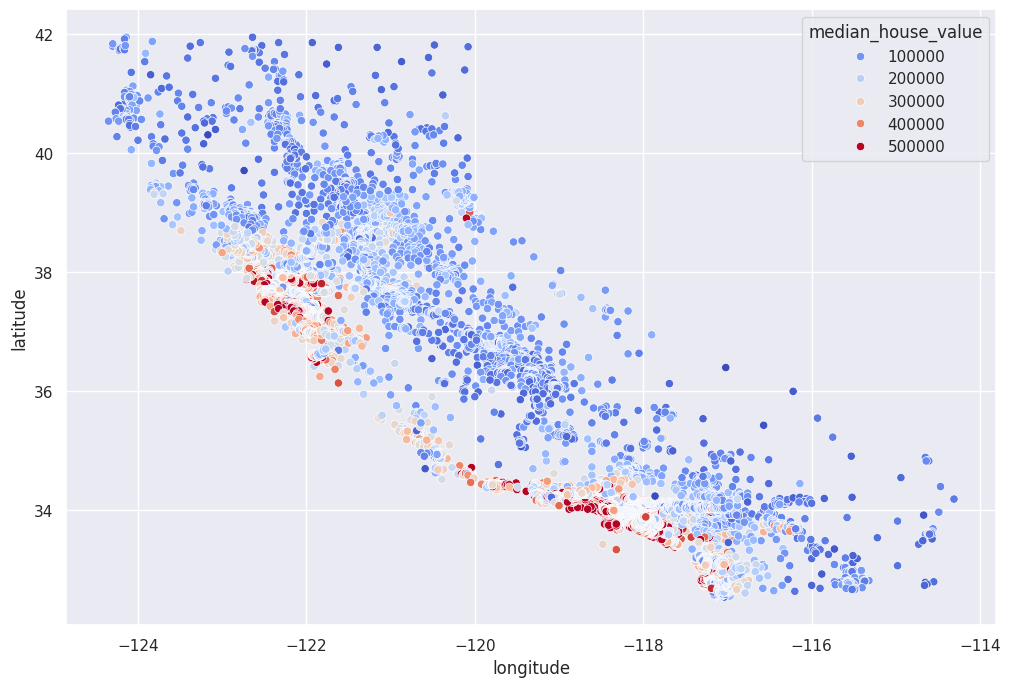

In [13]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=data, x='longitude', y='latitude', hue='median_house_value',palette='coolwarm')
plt.show()

#Can observe the nearer to the coast, the higher the price

In [14]:
# Combine Features
data['bedroom_ratio']=data['total_bedrooms']/data['total_rooms']
data['household_rooms']=data['total_rooms']/data['households']

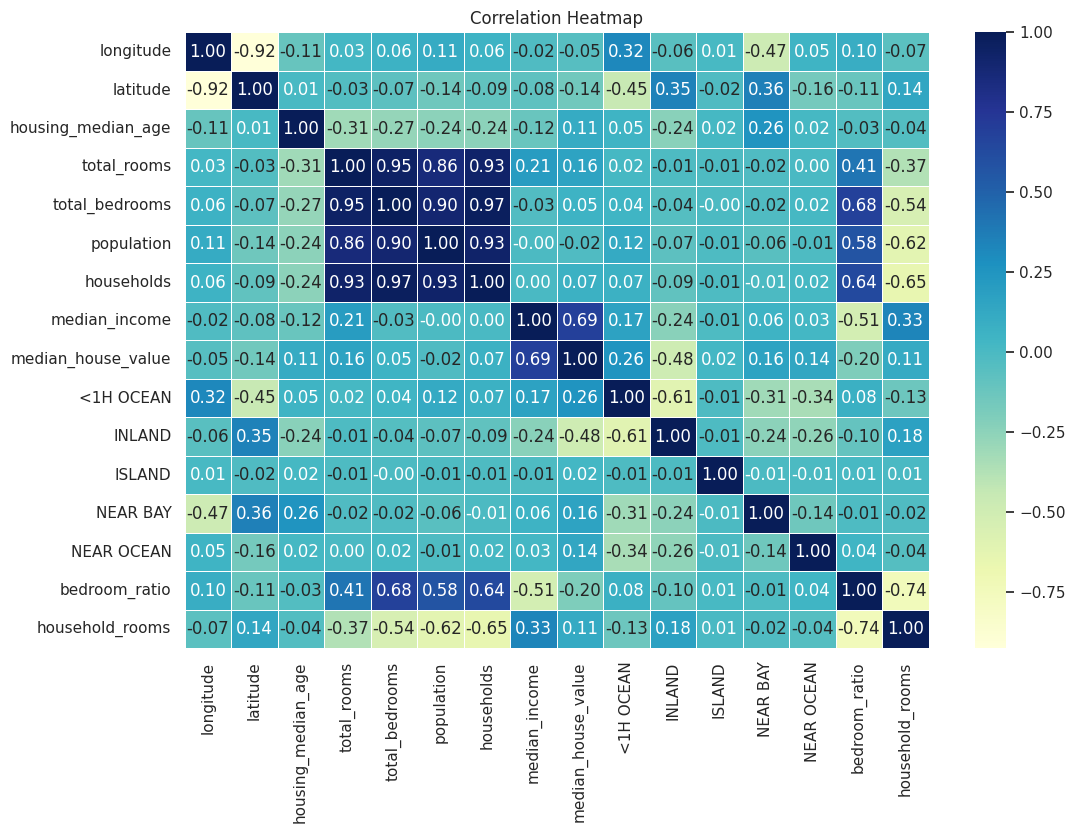

In [15]:
data_corr=data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(data_corr, annot=True, fmt=".2f", cmap="YlGnBu", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [16]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', '<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY',
       'NEAR OCEAN', 'bedroom_ratio', 'household_rooms'],
      dtype='object')

# Data Modelling

In [17]:
# Make sure the data is split equally for the selected Features
data.reset_index(drop=True, inplace=True)
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2)
for train_indices, test_indices in split.split(data, data[['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY','NEAR OCEAN']]):
    strat_train_set = data.loc[train_indices]
    strat_test_set = data.loc[test_indices]

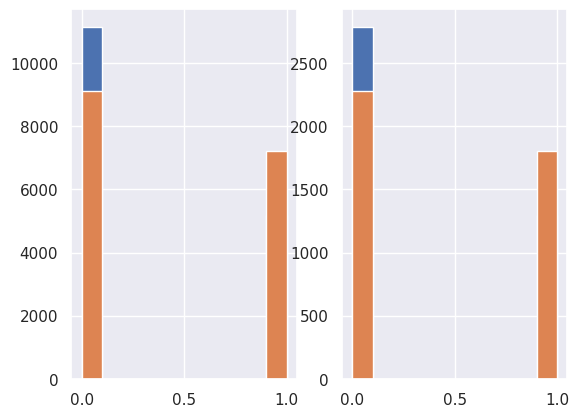

In [18]:
plt.subplot(1,2,1)
strat_train_set['INLAND'].hist()
strat_train_set['<1H OCEAN'].hist()

plt.subplot(1,2,2)
strat_test_set['INLAND'].hist()
strat_test_set['<1H OCEAN'].hist()

plt.show()

# Main objective is to ensure the the data set is split the same for both train and test
# Test data is split just to ensure the train data we have is similar with the test data

In [19]:
from sklearn.preprocessing import StandardScaler

# Features to be scaled
numerical_features = ['longitude', 'latitude', 'housing_median_age',
                      'median_income', 'bedroom_ratio', 'household_rooms',
                      '<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY','NEAR OCEAN']

# Create scaler object
scaler = StandardScaler()

# Fit and transform the selected features in the training data
strat_train_set[numerical_features] = scaler.fit_transform(strat_train_set[numerical_features])

# Transform the selected features in the testing data
strat_test_set[numerical_features] = scaler.transform(strat_test_set[numerical_features])

In [20]:
strat_train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
12298,1.67,-0.89,0.03,7.03,5.40,6.82,5.48,-0.53,72100.00,-0.89,1.46,-0.02,-0.35,-0.38,-0.66,0.04
17773,-1.20,0.80,0.19,7.53,6.14,6.71,6.10,-0.80,275900.00,1.12,-0.68,-0.02,-0.35,-0.38,0.64,-0.61
8325,0.60,-0.79,1.07,6.94,5.63,7.22,5.57,-0.29,144600.00,1.12,-0.68,-0.02,-0.35,-0.38,0.53,-0.46
2256,-0.12,0.55,0.35,8.14,6.67,7.50,6.66,-1.02,67500.00,-0.89,1.46,-0.02,-0.35,-0.38,0.73,-0.77
12800,-0.88,1.43,-0.20,7.05,5.27,6.22,5.27,0.64,163400.00,-0.89,1.46,-0.02,-0.35,-0.38,-1.23,0.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6321,0.75,-0.69,0.27,8.54,6.50,7.54,6.43,2.29,500001.00,-0.89,1.46,-0.02,-0.35,-0.38,-0.86,0.62
19299,-0.72,0.96,0.83,7.47,5.80,6.72,5.71,-0.67,135600.00,-0.89,1.46,-0.02,-0.35,-0.38,-0.43,0.34
3727,0.59,-0.68,0.51,7.99,6.68,7.65,6.62,-0.50,177300.00,1.12,-0.68,-0.02,-0.35,-0.38,1.19,-0.95
15799,-1.45,0.99,1.86,7.46,5.77,6.79,5.71,0.23,261800.00,-0.89,-0.68,-0.02,2.83,-0.38,-0.51,0.34


### Linear Regression

In [21]:
from sklearn.linear_model import LinearRegression

# Dependent Variable
train_targets = strat_train_set['median_house_value']

# Independent Variables
train_inputs = strat_train_set.drop(['median_house_value'], axis=1)

# Convert column names to strings if necessary
train_inputs.columns = train_inputs.columns.astype(str)
train_inputs.columns = train_inputs.columns.str.replace(r'[\<]', '', regex=True)

# Create and fit the model
reg = LinearRegression()
reg.fit(train_inputs, train_targets)

LinearRegression()

In [22]:
# Repeat the same for strattestdata

# Dependent Variable
test_targets = strat_test_set['median_house_value']

# Independent Variables
test_inputs = strat_test_set.drop(['median_house_value'], axis=1)

test_inputs.columns = test_inputs.columns.astype(str)
test_inputs.columns = test_inputs.columns.str.replace(r'[\<]', '', regex=True)


# Create and fit the model
reg = LinearRegression()
reg.fit(test_inputs, test_targets)

# Make predictions on the test set
y_hat_test = reg.predict(test_inputs)

In [23]:
reg.score(test_inputs, test_targets)
# R2 only at 67%, quite low, so we will explore other ML model

0.6689753421463213

### Polynomial Regression

In [24]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly = PolynomialFeatures(degree=2)  # Choose the desired degree
X_poly = poly.fit_transform(train_inputs)

poly_reg = LinearRegression()
poly_reg.fit(X_poly, train_targets)

LinearRegression()

In [29]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge

from sklearn.metrics import r2_score, mean_squared_error

# Polynomial features
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(train_inputs)
X_test_poly = poly.transform(test_inputs)

# Ridge Regression
ridge_reg = Ridge(alpha=1.0)  # Adjust alpha for regularization strength
ridge_reg.fit(X_train_poly, train_targets)

# Evaluate performance
predictions = ridge_reg.predict(X_test_poly)
r2 = r2_score(test_targets, predictions)
rmse = mean_squared_error(test_targets, predictions, squared=False)
print(f"R-squared: {r2:.2f}")
print(f"RMSE: {rmse:.2f}")

R-squared: 0.70
RMSE: 63291.53


In [31]:
# 3 Minutes
# Hyperparameter Tuning
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Ridge  # Or Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# Create a pipeline for PolynomialFeatures and Ridge Regression
pipeline = Pipeline([
    ('poly', PolynomialFeatures()),
    ('scaler', StandardScaler()),  # Add StandardScaler for feature scaling
    ('ridge', Ridge())  # Or Lasso
])

# Define the parameter grid
param_grid = {
    'poly__degree': [2, 3, 4],  # Search over polynomial degrees
    'ridge__alpha': [0.1, 1.0, 10.0]  # Search over regularization strengths
}

# Create a GridSearchCV object
poly_grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the GridSearchCV object to the training data
poly_grid_search.fit(train_inputs, train_targets)

# Get the best hyperparameters
best_params = poly_grid_search.best_params_

# Get the best estimator
best_poly_reg = poly_grid_search.best_estimator_

# Evaluate the best estimator on the test data
predictions = best_poly_reg.predict(test_inputs)
r2 = r2_score(test_targets, predictions)
rmse = mean_squared_error(test_targets, predictions, squared=False)

# Print the results
print(f"Best Hyperparameters: {best_params}")
print(f"R-squared: {r2:.2f}")
print(f"RMSE: {rmse:.2f}")

Best Hyperparameters: {'poly__degree': 3, 'ridge__alpha': 10.0}
R-squared: 0.64
RMSE: 68479.67


### Decision Tree Regression

In [32]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(train_inputs, train_targets)

DecisionTreeRegressor()

In [33]:
from sklearn.metrics import r2_score, mean_squared_error

# Make predictions on the test set
predictions = tree_reg.predict(test_inputs)

# Calculate R-squared
r2 = r2_score(test_targets, predictions)

# Calculate RMSE
rmse = mean_squared_error(test_targets, predictions, squared=False)

# Print the results
print(f"R-squared: {r2:.2f}")
print(f"RMSE: {rmse:.2f}")

R-squared: 0.65
RMSE: 68160.05


In [34]:
# Hyperpameter Tuning
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'max_depth': [2, 4, 6, 8, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a Decision Tree Regressor object
tree_reg = DecisionTreeRegressor()

# Create a GridSearchCV object
tree_grid_search = GridSearchCV(tree_reg, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the GridSearchCV object to the training data
tree_grid_search.fit(train_inputs, train_targets)

# Get the best hyperparameters
best_params = tree_grid_search.best_params_

# Get the best estimator
best_tree_reg = tree_grid_search.best_estimator_

# Evaluate the best estimator on the test data
predictions = best_tree_reg.predict(test_inputs)
r2 = r2_score(test_targets, predictions)
rmse = mean_squared_error(test_targets, predictions, squared=False)

# Print the results
print(f"Best Hyperparameters: {best_params}")
print(f"R-squared: {r2:.2f}")
print(f"RMSE: {rmse:.2f}")

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
R-squared: 0.71
RMSE: 61449.94


### Random Forest Regression

In [35]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

forest = RandomForestRegressor(random_state=42)
forest.fit(train_inputs, train_targets)

RandomForestRegressor(random_state=42)

In [36]:
forest.score(test_inputs,test_targets)
# Better than Linear Regression without hyperparameter tuning

0.8117820913840307

In [37]:
#10 minutes
#Hyperparameter tuning
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

forest = RandomForestRegressor(random_state=42)

param_grid = [
    {"n_estimators": [100,200],
     'min_samples_split':[4,6],
     'max_depth':[None,4]
    }
]

# Corrected the order of arguments to grid_search.fit() and change scoring to "r2"
grid_search = GridSearchCV(forest, param_grid, cv=3, scoring="neg_mean_squared_error", return_train_score=True)
grid_search.fit(train_inputs, train_targets)

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_depth': [None, 4], 'min_samples_split': [4, 6],
                          'n_estimators': [100, 200]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [38]:
best_forest=grid_search.best_estimator_
best_forest

RandomForestRegressor(min_samples_split=4, n_estimators=200, random_state=42)

In [39]:
best_forest.score(test_inputs,test_targets)
# Not much difference even after hyperparameter tuning

0.8138903704246313

### Gradient Boosting Regression (XGBoost)

In [40]:
#2 minutes
import xgboost as xgb

# Create an XGBoost regressor object
xgb_model = xgb.XGBRegressor(random_state=42)
xgb_model.fit(train_inputs, train_targets)

# Make predictions on the test set
predictions = xgb_model.predict(test_inputs)

# Calculate R-squared
r2 = r2_score(test_targets, predictions)

# Calculate RMSE
rmse = mean_squared_error(test_targets, predictions, squared=False)

# Print the results
print(f"R-squared: {r2:.2f}")
print(f"RMSE: {rmse:.2f}")


R-squared: 0.82
RMSE: 48236.42


In [41]:
# Define the parameter grid for tuning
param_grid_xgb = {
       'n_estimators': [100, 200],
       'learning_rate': [0.01, 0.1],
       'max_depth': [3, 5],
       'subsample': [0.8, 1.0],
       'colsample_bytree': [0.8, 1.0]
   }

# Create GridSearchCV object
grid_search_xgb = GridSearchCV(xgb_model, param_grid_xgb, cv=3,scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_xgb.fit(train_inputs, train_targets)

best_xgb_model = grid_search_xgb.best_estimator_

In [42]:
best_xgb_model.score(test_inputs,test_targets)
#Slightly better than RandomForest

0.8189876349068866

### Support Vector Regression (SVR)

In [43]:
#20 minutes

# from sklearn.svm import SVR

# # Create an SVM regressor object
# svm_model = SVR()

#    # Define the parameter grid for tuning (example)
# param_grid_svm = {
#        'kernel': ['linear'],
#        'C': [10,30,50],
#        'epsilon': [ 0.5,0.7,0.9]
# }

#    # Create GridSearchCV object
# grid_search_svm = GridSearchCV(svm_model, param_grid_svm, cv=5,
#                                  scoring='neg_mean_squared_error', n_jobs=-1)

#    # Fit the model
# grid_search_svm.fit(train_inputs, train_targets)

#    # Get the best estimator
# best_svm_model = grid_search_svm.best_estimator_

In [44]:
# best_svm_model.score(test_inputs,test_targets)
# Worst model among all

In [45]:
# best_svm_model

## Connect to the Problem Statement of this Project

# 1. Understanding the Factors Driving House Prices
#### Understand the features having the strongest impact on median house values.

In [46]:
# Select the model with highest score to identify which factor impacts the house price the most

feature_importances = best_xgb_model.feature_importances_
feature_names = train_inputs.columns

importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

               Feature  Importance
9               INLAND        0.48
7        median_income        0.22
12          NEAR OCEAN        0.05
11            NEAR BAY        0.03
0            longitude        0.03
2   housing_median_age        0.03
1             latitude        0.03
13       bedroom_ratio        0.02
5           population        0.02
4       total_bedrooms        0.02
6           households        0.02
8             1H OCEAN        0.02
3          total_rooms        0.01
14     household_rooms        0.01
10              ISLAND        0.01


In [47]:
# Calculate the correlation
correlation = data['INLAND'].corr(data['median_house_value'])

# Print the correlation
print(f"Correlation between INLAND and median_house_value: {correlation:.2f}")

# This shows that INLAND and house price have inverse relationship, when the house is located near INLAND,
# the house have lower price

Correlation between INLAND and median_house_value: -0.48


# 2. Geographic Visualization
#### Helps identify areas with high or low housing costs, providing insights for urban planning and investment decisions.

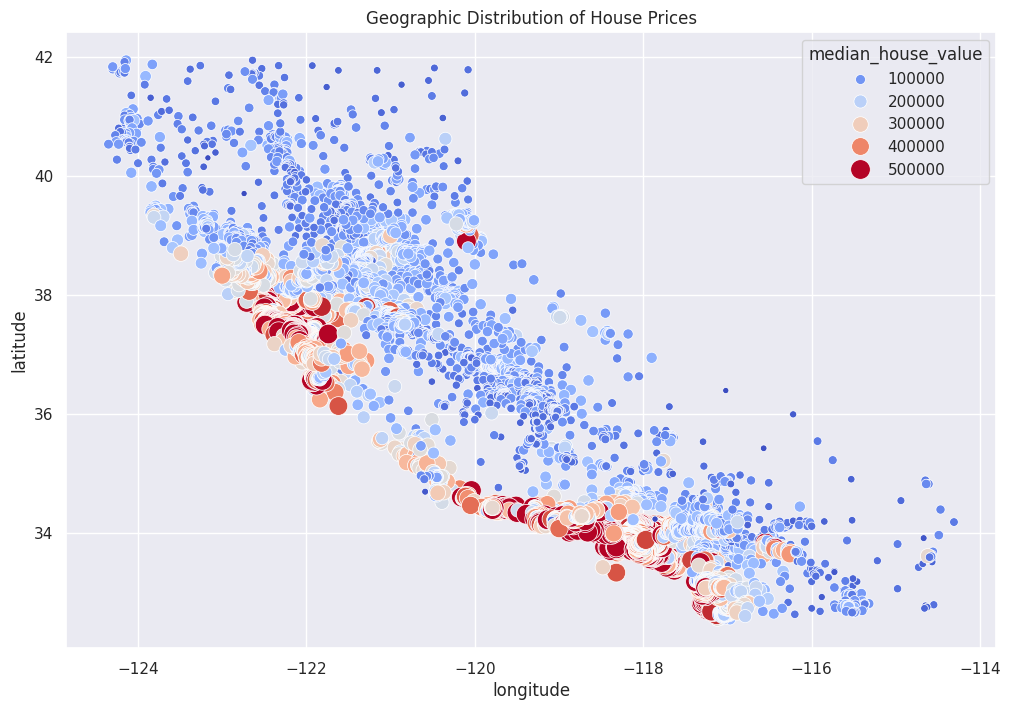

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' contains your original dataset with latitude and longitude

plt.figure(figsize=(12, 8))
sns.scatterplot(data=data, x='longitude', y='latitude', hue='median_house_value', palette='coolwarm', size='median_house_value', sizes=(20, 200))
plt.title('Geographic Distribution of House Prices')
plt.show()

# Similar with EDA result

# 3. Comparative Analysis: Evaluating Multiple Models

R-squared: Measures the goodness of fit of the model. Higher R-squared values indicate better performance.

RMSE (Root Mean Squared Error): Measures the average difference between predicted and actual values. Lower RMSE values indicate better performance.

Other metrics: Consider using additional metrics like MAE (Mean Absolute Error) or MAPE (Mean Absolute Percentage Error) for a more comprehensive evaluation.

In [51]:
from sklearn.metrics import r2_score, mean_squared_error

# Assuming you have trained models: 'reg' (Linear Regression), 'forest' (Random Forest), 'xgb_model' (XGBoost)
# And test data: 'test_inputs', 'test_targets'

models = ['Linear Regression', 'Polynomial Regression','Decision Tree','Random Forest', 'XGBoost']
r2_scores = []
rmse_scores = []

# Evaluate each model
for model_name, model in zip(models, [reg,poly_grid_search,tree_grid_search,grid_search,grid_search_xgb]):
  predictions = model.predict(test_inputs)
  r2 = r2_score(test_targets, predictions)
  rmse = mean_squared_error(test_targets, predictions, squared=False)
  r2_scores.append(r2)
  rmse_scores.append(rmse)

# Create a DataFrame for comparison
results_df = pd.DataFrame({'Model': models, 'R-squared': r2_scores, 'RMSE': rmse_scores})
results_df = results_df.sort_values(by=['R-squared'], ascending=False)
print(results_df)

#XGBoost is the best model

                   Model  R-squared     RMSE
4                XGBoost       0.82 48870.17
3          Random Forest       0.81 49553.47
2          Decision Tree       0.71 61449.94
0      Linear Regression       0.67 66087.58
1  Polynomial Regression       0.64 68479.67


In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

# Assuming you have trained models: 'reg' (Linear Regression), 'forest' (Random Forest), 'xgb_model' (XGBoost)
# And test data: 'test_inputs', 'test_targets'

models = ['Linear Regression', 'Polynomial Regression','Decision Tree','Random Forest', 'XGBoost']
r2_scores = []
rmse_scores = []

# Evaluate each model
for model_name, model in zip(models, [reg,poly_grid_search,tree_grid_search,grid_search,grid_search_xgb]):
  predictions = model.predict(test_inputs)
  r2 = r2_score(test_targets, predictions)
  rmse = mean_squared_error(test_targets, predictions, squared=False)
  r2_scores.append(r2)
  rmse_scores.append(rmse)

# Create a DataFrame for comparison
results_df = pd.DataFrame({'Model': models, 'R-squared': r2_scores, 'RMSE': rmse_scores})
results_df = results_df.sort_values(by=['R-squared'], ascending=False)
print(results_df)

#XGBoost is the best model

                   Model  R-squared     RMSE
4                XGBoost       0.82 48870.17
3          Random Forest       0.81 49553.47
2          Decision Tree       0.71 61449.94
0      Linear Regression       0.67 66087.58
1  Polynomial Regression       0.64 68479.67


In [52]:
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error

# Assuming you have trained models: 'reg' (Linear Regression), 'forest' (Random Forest), 'xgb_model' (XGBoost)
# And test data: 'test_inputs', 'test_targets'

models = ['Linear Regression', 'Polynomial Regression','Decision Tree','Random Forest', 'XGBoost']
r2_scores = []
rmse_scores = []
mae_scores = []

# Evaluate each model
for model_name, model in zip(models, [reg, poly_grid_search, tree_grid_search, grid_search, grid_search_xgb]):
    predictions = model.predict(test_inputs)
    r2 = r2_score(test_targets, predictions)
    rmse = mean_squared_error(test_targets, predictions, squared=False)
    mae = mean_absolute_error(test_targets, predictions)  # Calculate MAE
    r2_scores.append(r2)
    rmse_scores.append(rmse)
    mae_scores.append(mae)  # Append MAE to the list

# Create a DataFrame for comparison
results_df = pd.DataFrame({'Model': models, 'R-squared': r2_scores, 'RMSE': rmse_scores, 'MAE': mae_scores})  # Include MAE column
results_df = results_df.sort_values(by=['R-squared'], ascending=False)
print(results_df)

#XGBoost is the best model

                   Model  R-squared     RMSE      MAE
4                XGBoost       0.82 48870.17 31950.27
3          Random Forest       0.81 49553.47 32058.63
2          Decision Tree       0.71 61449.94 40895.09
0      Linear Regression       0.67 66087.58 47682.91
1  Polynomial Regression       0.64 68479.67 39807.54


# 4. Make Predictions Based on New Data

#### This predicted value can then be used by stakeholders to make informed decisions about the property.

In [50]:
# # Create a DataFrame for the new data
# new_data = pd.DataFrame({
#     'longitude': [-122.23],
#     'latitude': [37.88],
#     'housing_median_age': [41],
#     'total_rooms': [880],
#     'total_bedrooms': [129],
#     'population': [322],
#     'households': [126],
#     'median_income': [8.3252],
#     'ocean_proximity': ['NEAR BAY']
# })

# # Preprocess the new data (apply the same steps as during training)
# # ...

# # Make the prediction
# predicted_value = best_xgb_model.predict(new_data)

# # Print the predicted value
# print(f"Predicted median house value: {predicted_value[0]:.2f}")